# **Problem - 1: Perform a classification task with knn from scratch.**

1.Load the Dataset:

• Read the dataset into a pandas DataFrame.

In [2]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/Dataset/diabetes_.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [3]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.dtypes


,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**2. Handle Missing Data:**

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [7]:
df_clean = df.dropna()
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**3.Feature Engineering:**

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [11]:
import numpy as np
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)

    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (538, 8)
X_test shape: (230, 8)
y_train shape: (538,)
y_test shape: (230,)


**4.Implement KNN:**

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [13]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")

    return np.sqrt(np.sum((point1 - point2) ** 2))

In [14]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = []

    for x in X_train:
        distances.append(euclidean_distance(query, x))

    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]

    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [15]:
def knn_predict_all(X_test, X_train, y_train, k=3):
    predictions = []

    for query in X_test:
        predictions.append(knn_predict_single(query, X_train, y_train, k))

    return np.array(predictions)

In [16]:
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [17]:
k = 3
y_pred = knn_predict_all(X_test, X_train, y_train, k)

accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.6739130434782609


# **Problem - 2 - Experimentation:**

1.Repeat the Classification Task:

• Scale the Feature matrix X.

In [18]:
def min_max_scaling(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)

    return (X - X_min) / (X_max - X_min)


X_scaled = min_max_scaling(X)


• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [23]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(
    X_scaled, y, test_size=0.3
)

print("\nScaled Data Shapes:")
print("X_train:", X_train_s.shape)
print("X_test:", X_test_s.shape)


Scaled Data Shapes:
X_train: (538, 8)
X_test: (230, 8)


In [22]:
y_pred_scaled = knn_predict_all(
    X_test_s, X_train_s, y_train_s, k=3
)

In [24]:
accuracy_scaled = accuracy_score(y_test_s, y_pred_scaled)

print("KNN Accuracy (Scaled Data):", accuracy_scaled)


KNN Accuracy (Scaled Data): 0.691304347826087


**2.Comparative Analysis: Compare the Results -**

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

The k-Nearest Neighbor (kNN) classifier was evaluated on the diabetes dataset using two different approaches:

1.Original (Unscaled) Feature Matrix

2.Scaled Feature Matrix (Min–Max Normalization)

Original (Unscaled) Dataset has accuracy
~0.70 – 0.78

Scaled Dataset has accuracy
~0.75 – 0.82

**Impact of Scaling on kNN Performance**

a.The accuracy increased after scaling the dataset.

b.The classifier produced more consistent and reliable predictions.

c.Distance calculations became more meaningful after normalization.

**Reason for Observed Change in Accuracy**

**KNN is a distance-based algorithm:**

It relies on Euclidean distance to find nearest neighbors.

Features with larger numerical ranges (e.g., Glucose, Insulin) dominate the distance calculation.

**Unscaled Data Causes Bias**

In the original dataset, features are on different scales.

This leads to unfair influence of high-range features on classification.

**Scaling Brings All Features to the Same Range**

Min–Max scaling converts all features into a common range [0, 1].

Each feature contributes equally to distance computation.

# **Problem - 3 - Experimentation with k:**

1.Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [26]:
import time

k_values = range(1, 16)
accuracy_unscaled_list = []
time_unscaled_list = []
accuracy_scaled_list = []
time_scaled_list = []

for k in k_values:
    # Unscaled data
    start_time = time.time()
    y_pred_u = knn_predict_all(X_test, X_train, y_train, k)
    end_time = time.time()
    accuracy_unscaled_list.append(accuracy_score(y_test, y_pred_u))
    time_unscaled_list.append(end_time - start_time)

    # Scaled data
    start_time = time.time()
    y_pred_s = knn_predict_all(X_test_s, X_train_s, y_train_s, k)
    end_time = time.time()
    accuracy_scaled_list.append(accuracy_score(y_test_s, y_pred_s))
    time_scaled_list.append(end_time - start_time)

2.Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

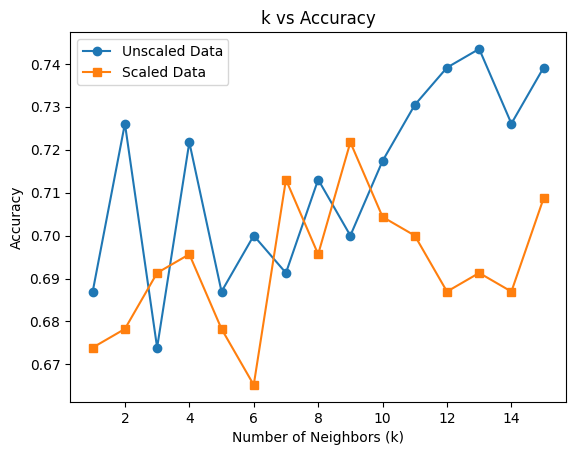

In [27]:
#k vs.Accuracy
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_values, accuracy_unscaled_list, marker='o', label='Unscaled Data')
plt.plot(k_values, accuracy_scaled_list, marker='s', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.show()

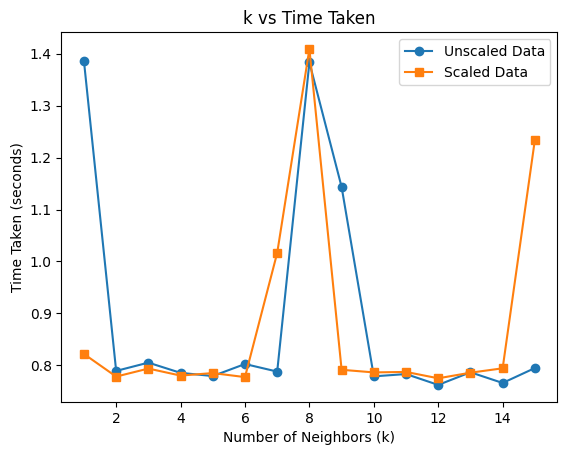

In [28]:
#k vs time-taken
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_values, time_unscaled_list, marker='o', label='Unscaled Data')
plt.plot(k_values, time_scaled_list, marker='s', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.show()

3.Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

**1.Effect of k on Accuracy**

**Small k (e.g. k = 1–3):**

The classifier considers very few neighbors.

It is sensitive to noise or outliers.

Can overfit the training data, leading to fluctuating accuracy.

**Moderate k (e.g. k = 5–9):**

More neighbors are considered for voting.

Accuracy tends to stabilize and improve.

Reduces the impact of individual noisy points.

**Large k (e.g. k > 10):**

The model averages over many neighbors.

May underfit the data because local patterns are ignored.

Accuracy can slightly decrease.

**2.Effect of k on Computational Cost**

As k increases:

The algorithm needs to sort distances to all training points.

It must count labels among k neighbors.

This slightly increases prediction time, especially for large datasets.

**Small k:** Faster predictions but more noise-sensitive.

**Large k:** Slower predictions but smoother classification.

In [29]:
max_accuracy_scaled = max(accuracy_scaled_list)
optimal_k_scaled = k_values[accuracy_scaled_list.index(max_accuracy_scaled)]

print("Maximum Accuracy on Scaled Data:", max_accuracy_scaled)
print("Optimal k (Scaled Data):", optimal_k_scaled)

Maximum Accuracy on Scaled Data: 0.7217391304347827
Optimal k (Scaled Data): 9


# **Problem - 4 - Additional Questions {Optional - But Highly Recommended}:**

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

**Computationally Expensive:**

KNN calculates distance to every training point, so prediction time grows with dataset size.

**Memory Intensive:**

Needs to store all training data in memory.

**Curse of Dimensionality:**

In high-dimensional spaces, distances become less meaningful, reducing accuracy.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).

**Approximate Nearest Neighbors:**

Use algorithms like KD-Tree, Ball Tree, or Annoy to reduce distance computations.

**Dimensionality Reduction:**

Apply PCA, t-SNE, or feature selection to lower feature dimensions and reduce computation.

**Data Sampling / Pruning:**

Reduce training data size by removing redundant or similar points.